In [2]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

# get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words('english')

# list to keep track of all words in all of the texts
dickens_words = list()

# function that takes a word and returns true if it consists only
#   of non-alphabetic characters  (assumes import re)
def alpha_filter(w):
    # pattern to match word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [3]:
# grab raw text and tokenize 'A Christmas Carol' and make everything lowercase
f = open("a_christmas_carol.txt")
a_christmas_carol_raw = f.read()
a_christmas_carol_tokens = nltk.word_tokenize(a_christmas_carol_raw)
a_christmas_carol_words = [t.lower() for t in a_christmas_carol_tokens]
a_christmas_carol_words = [w for w in a_christmas_carol_words if not w in stopwords]
a_christmas_carol_words = [w for w in a_christmas_carol_words if not alpha_filter(w)]
dickens_words.append(a_christmas_carol_words)

# find word frequencies and the most common word occurances
a_christmas_carol_freq = FreqDist(a_christmas_carol_words)
a_christmas_carol_freq
a_christmas_carol_most_common = a_christmas_carol_freq.most_common(50)

# Bigrams and Bigram frequency distribution
a_christmas_carol_bigrams = list(nltk.bigrams(a_christmas_carol_words))
a_christmas_carol_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(a_christmas_carol_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)
    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(a_christmas_carol_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)
    

# Trigrams and Trigram frequency distribution
a_christmas_carol_trigrams = list(nltk.trigrams(a_christmas_carol_words))

In [4]:
# grab raw text and tokenize 'A Tale of Two Cities' and make everything lowercase
f = open("a_tale_of_two_cities.txt")
a_tale_of_two_cities_raw = f.read()
a_tale_of_two_cities_tokens = nltk.word_tokenize(a_tale_of_two_cities_raw)
a_tale_of_two_cities_words = [t.lower() for t in a_tale_of_two_cities_tokens]
a_tale_of_two_cities_words = [w for w in a_tale_of_two_cities_words if not w in stopwords]
a_tale_of_two_cities_words = [w for w in a_tale_of_two_cities_words if not alpha_filter(w)]
dickens_words.append(a_tale_of_two_cities_words)

# find word frequencies and the most common word occurances
a_tale_of_two_cities_freq = FreqDist(a_tale_of_two_cities_words)
a_tale_of_two_cities_freq
a_tale_of_two_cities_most_common = a_tale_of_two_cities_freq.most_common(50)

# Bigrams and Bigram frequency distribution
a_tale_of_two_cities_bigrams = list(nltk.bigrams(a_tale_of_two_cities_words))
a_tale_of_two_cities_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(a_tale_of_two_cities_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)
    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(a_tale_of_two_cities_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)

In [30]:
# grab raw text and tokenize 'Bleak House' and make everything lowercase
f = open("bleak_house.txt")
bleak_house_raw = f.read()

stopwords.append("mr.")
stopwords.append("mrs.")
stopwords.append("miss")
stopwords.append("said")
stopwords.append("'s")

bleak_house_tokens = nltk.word_tokenize(bleak_house_raw)
bleak_house_words = [t.lower() for t in bleak_house_tokens]
bleak_house_words = [w for w in bleak_house_words if not w in stopwords]
bleak_house_words = [w for w in bleak_house_words if not alpha_filter(w)]
dickens_words.append(bleak_house_words)

# find word frequencies and the most common word occurances
bleak_house_freq = FreqDist(bleak_house_words)
bleak_house_freq
bleak_house_most_common = bleak_house_freq.most_common(50)

# Bigrams and Bigram frequency distribution
bleak_house_bigrams = list(nltk.bigrams(bleak_house_words))
bleak_house_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(bleak_house_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)

    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(bleak_house_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)

for bscore in scored[:50]:
    print(bscore)

(('sir', 'leicester'), 0.0028459512140441776)
(("n't", 'know'), 0.001133398514127003)
(('lady', 'dedlock'), 0.0011271710497636677)
(('ca', "n't"), 0.0009216647257736068)
(('leicester', 'dedlock'), 0.0006663386868768643)
(('chesney', 'wold'), 0.0006414288294235237)
(('little', 'woman'), 0.000585381650153507)
(('old', 'man'), 0.000585381650153507)
(('says', 'bucket'), 0.0005231070065201552)
(('wo', "n't"), 0.0004857422203401441)
(('old', 'lady'), 0.0004546048985234682)
(('old', 'girl'), 0.00043592250543346265)
(('young', 'man'), 0.00043592250543346265)
(('says', 'guppy'), 0.00042969504107012745)
(('dedlock', 'baronet'), 0.0004172401123434571)
(('could', "n't"), 0.00037987532616344603)
(('jarndyce', 'jarndyce'), 0.00037987532616344603)
(('bleak', 'house'), 0.0003611929330734405)
(('says', 'george'), 0.0003611929330734405)
(('would', "n't"), 0.0003611929330734405)
(('grandfather', 'smallweed'), 0.00033628307562009975)
(('young', 'lady'), 0.00033628307562009975)
(('one', 'another'), 0.00033

In [6]:
# grab raw text and tokenize 'David Copperfield' and make everything lowercase
f = open("david_copperfield.txt")
david_copperfield_raw = f.read()
david_copperfield_tokens = nltk.word_tokenize(david_copperfield_raw)
david_copperfield_words = [t.lower() for t in david_copperfield_tokens]
david_copperfield_words = [w for w in david_copperfield_words if not w in stopwords]
david_copperfield_words = [w for w in david_copperfield_words if not alpha_filter(w)]
dickens_words.append(david_copperfield_words)

# find word frequencies and the most common word occurances
david_copperfield_freq = FreqDist(david_copperfield_words)
david_copperfield_freq
david_copperfield_most_common = david_copperfield_freq.most_common(50)

# Bigrams and Bigram frequency distribution
david_copperfield_bigrams = list(nltk.bigrams(david_copperfield_words))
david_copperfield_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(david_copperfield_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)

# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(david_copperfield_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)

In [29]:
# grab raw text and tokenize 'Great Expectations' and make everything lowercase
f = open("great_expectations.txt")
great_expectations_raw = f.read()

stopwords.append("mr.")
stopwords.append("mrs.")
stopwords.append("miss")
stopwords.append("said")
stopwords.append("'s")

great_expectations_tokens = nltk.word_tokenize(great_expectations_raw)
great_expectations_words = [t.lower() for t in great_expectations_tokens]
great_expectations_words = [w for w in great_expectations_words if not w in stopwords]
great_expectations_words = [w for w in great_expectations_words if not alpha_filter(w)]
dickens_words.append(great_expectations_words)

# find word frequencies and the most common word occurances
great_expectations_freq = FreqDist(great_expectations_words)
great_expectations_freq
great_expectations_most_common = great_expectations_freq.most_common(50)

# Bigrams and Bigram frequency distribution
great_expectations_bigrams = list(nltk.bigrams(great_expectations_words))
great_expectations_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(great_expectations_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print(bscore)
    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(great_expectations_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)
great_expectations_bigrams[:50]

for bscore in scored[:50]:
    print(bscore)

(("n't", 'know'), 0.0009322908250152274)
(('dear', 'boy'), 0.000882568647681082)
(('ai', "n't"), 0.0006588188496774274)
(('ca', "n't"), 0.0005345134063420638)
(('old', 'chap'), 0.000509652317674991)
(('one', 'another'), 0.000509652317674991)
(('could', "n't"), 0.00048479122900791825)
(('wo', "n't"), 0.00047236068467438187)
(('would', "n't"), 0.00044749959600730917)
(('never', 'seen'), 0.0003604857856725546)
(('could', 'see'), 0.0003480552413390182)
(('young', 'man'), 0.0003480552413390182)
(('young', 'gentleman'), 0.00031076360833840914)
(('last', 'night'), 0.00029833306400487276)
(('come', 'back'), 0.0002859025196713364)
(('go', 'home'), 0.0002859025196713364)
(('next', 'day'), 0.00027347197533780006)
(('old', 'orlick'), 0.00027347197533780006)
(('two', 'three'), 0.00027347197533780006)
(("n't", 'see'), 0.0002610414310042637)
(('uncle', 'pumblechook'), 0.0002610414310042637)
(('hand', 'upon'), 0.0002486108866707273)
(('jolly', 'bargemen'), 0.0002486108866707273)
(('long', 'time'), 0.0

In [8]:
# grab raw text and tokenize 'Hard Times' and make everything lowercase
f = open("hard_times.txt")
hard_times_raw = f.read()
hard_times_tokens = nltk.word_tokenize(hard_times_raw)
hard_times_words = [t.lower() for t in hard_times_tokens]
hard_times_words = [w for w in hard_times_words if not w in stopwords]
hard_times_words = [w for w in hard_times_words if not alpha_filter(w)]
dickens_words.append(hard_times_words)

# find word frequencies and the most common word occurances
hard_times_freq = FreqDist(hard_times_words)
hard_times_freq
hard_times_most_common = hard_times_freq.most_common(50)

# Bigrams and Bigram frequency distribution
hard_times_bigrams = list(nltk.bigrams(hard_times_words))
hard_times_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(hard_times_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)
    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(hard_times_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)

In [9]:
# grab raw text and tokenize 'Oliver Twist' and make everything lowercase
f = open("oliver_twist.txt")
oliver_twist_raw = f.read()
oliver_twist_tokens = nltk.word_tokenize(oliver_twist_raw)
oliver_twist_words = [t.lower() for t in oliver_twist_tokens]
oliver_twist_words = [w for w in oliver_twist_words if not w in stopwords]
oliver_twist_words = [w for w in oliver_twist_words if not alpha_filter(w)]
dickens_words.append(oliver_twist_words)

# find word frequencies and the most common word occurances
oliver_twist_freq = FreqDist(oliver_twist_words)
oliver_twist_freq
oliver_twist_most_common = oliver_twist_freq.most_common(50)

# Bigrams and Bigram frequency distribution
oliver_twist_bigrams = list(nltk.bigrams(oliver_twist_words))
oliver_twist_bigrams[:50]

# setup for bigrams and bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(oliver_twist_words)
finder.apply_ngram_filter(lambda w1, w2: len(w1) < 3 and len(w2) < 3)
finder.apply_freq_filter(2)
scored = finder.score_ngrams(bigram_measures.raw_freq)
    
# list the top 50 bigrams by the pointwise mutual information score with min frequency 5    
finder_pmi = BigramCollocationFinder.from_words(oliver_twist_words)
finder_pmi.apply_freq_filter(5)
pmi_scored = finder_pmi.score_ngrams(bigram_measures.pmi)

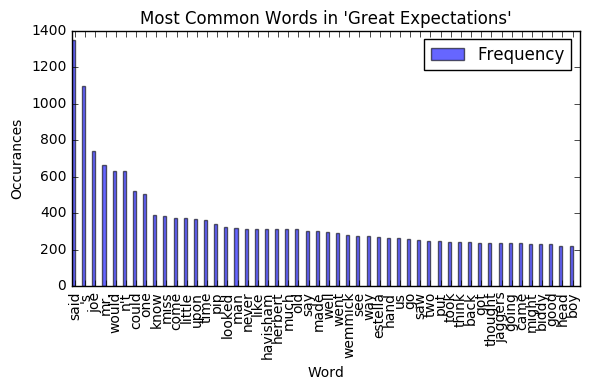

In [10]:
# VIZUALIZATION FOR MOST COMMON WORDS IN EACH TEXT
# just edit the most_common variable in the for loop to change text
# store most common words as a objects in a word array and count array
# then put these objects in a bar plot
word_arr = np.empty(50, dtype="object")
count_arr = np.empty(50, dtype="int")
i = 0
for word in great_expectations_most_common:
    word_arr[i] = word[0]
    count_arr[i] = word[1]
    i+=1

fig, ax = plt.subplots()

index = np.arange(50)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, 
                 count_arr, 
                 bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Frequency')

plt.xlabel('Word')
plt.ylabel('Occurances')
plt.title('Most Common Words in \'Great Expectations\'')
plt.xticks(index + bar_width, word_arr, rotation="vertical")
plt.legend()

plt.tight_layout()
plt.show()